# Computergestützte Mathematik zur Analysis

28.01.2021

Prof. Dr. Rüdiger Braun

In [2]:
from sympy import *
import numpy as np
from matplotlib import pyplot as plt
init_printing()

# Differentialgleichungen höherer Ordnung

In [3]:
x = Symbol('x')
y = Function('y')

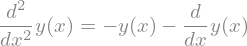

In [4]:
dgl = Eq(y(x).diff(x,2), -y(x).diff(x) - y(x))
dgl

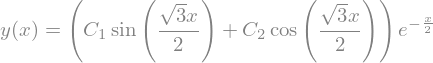

In [5]:
lsg = dsolve(dgl)
lsg

In [6]:
phi = lsg.rhs

Anfangsbedingungen $y(1)=2$, $y'(1)=3$

Kann `dsolve` jetzt doch

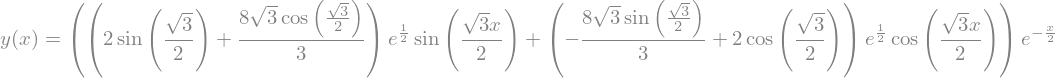

In [7]:
lsg = dsolve(dgl, ics={y(1): 2, y(x).diff(x).subs(x, 1): 3})
lsg

In [8]:
phi = lsg.rhs

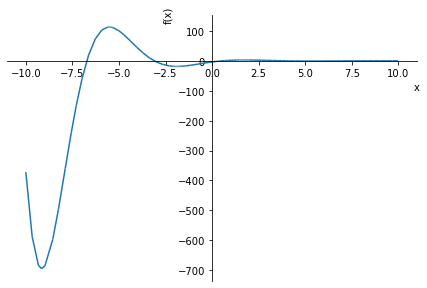

In [9]:
plot(phi);

# Besselfunktionen

In [10]:
x = S('x')
y = Function('y')
nu = Symbol('nu', positive=True)  #  nicht nötig

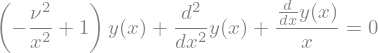

In [11]:
dgl = Eq(y(x).diff(x,2) + y(x).diff(x)/x + (1 - nu**2/x**2)*y(x), 0)
dgl

In [12]:
lsg = dsolve(dgl)
lsg

In [13]:
phi = lsg.rhs
print(phi)

C1*besselj(nu, x) + C2*bessely(nu, x)


$J_\nu$: Besselfunktion erster Art der Ordnung $\nu$

$Y_\nu$: Besselfunktion zweiter Art der Ordnung $\nu$, Webersche Funktion

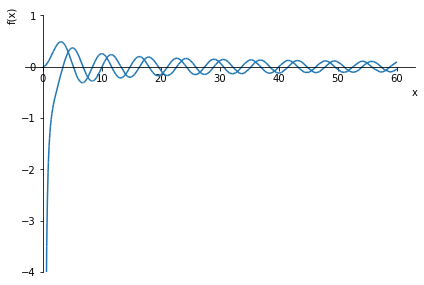

In [17]:
nu_n = 2
plot(besselj(nu_n, x), bessely(nu_n, x), (x, 0, 60), ylim=(-4,1));

Wronskische

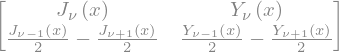

In [18]:
M = Matrix(2,2,[besselj(nu, x), bessely(nu,x), besselj(nu,x).diff(x), bessely(nu,x).diff(x)])
M

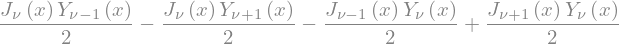

In [19]:
M.det()

In [20]:
besselsimp(M.det())

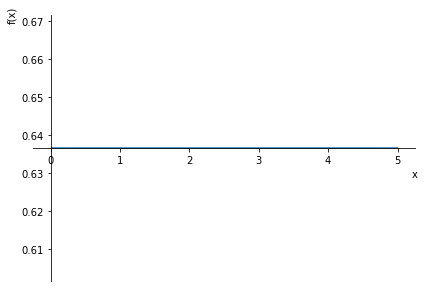

In [21]:
plot(M.det().subs(nu,Rational(3,2))*x, (x,0,5));

In [23]:
classify_ode(dgl)

('2nd_linear_bessel', '2nd_power_series_regular')

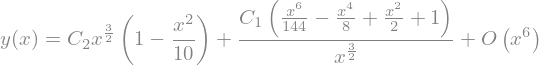

In [26]:
lsg_ser = dsolve(dgl.subs(nu,Rational(3,2)), func=y(x), hint='2nd_power_series_regular')
lsg_ser

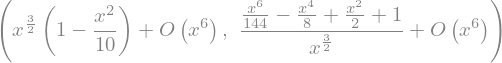

In [27]:
yy = lsg_ser.rhs
ps = yy.subs(S('C1'),0).subs(S('C2'), 1)
qs = yy.subs(S('C1'),1).subs(S('C2'), 0)
ps, qs

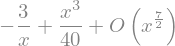

In [28]:
M = Matrix(2,2,[ps, qs, ps.diff(x), qs.diff(x)])
M.det()

# Gekoppelte Pendel

In [29]:
y = Function('y')
w = Function('w')
t = Symbol('t', positive=True)

In [31]:
a = Rational(1,7)
b = a

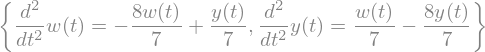

In [32]:
dgl1 = Eq(y(t).diff(t,2), a*w(t) - (1+a)*y(t))
dgl2 = Eq(w(t).diff(t,2), b*y(t) - (1+b)*w(t))
dgs = {dgl1, dgl2}
dgs

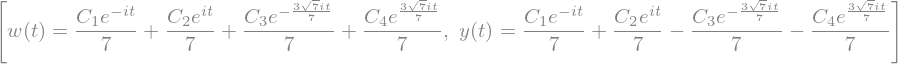

In [33]:
lsg = dsolve(dgs)
lsg

In [34]:
phi_c = lsg[0].rhs
psi_c = lsg[1].rhs

Bestimme reelles Fundamentalsystem

In [36]:
Cs = []
for j in range(4):
    Cs.append(S(f'C{j+1}'))
Cs

In [37]:
ersetzungen = [
    {Cs[0]: 1, Cs[1]: 1, Cs[2]: 0, Cs[3]: 0},
    {Cs[0]: I, Cs[1]: -I, Cs[2]: 0, Cs[3]: 0},
    {Cs[0]: 0, Cs[1]: 0, Cs[2]: 1, Cs[3]: 1},
    {Cs[0]: 0, Cs[1]: 0, Cs[2]: I, Cs[3]: -I},
]

In [38]:
fus = []
for s in ersetzungen:
    fus.append([phi_c.subs(s).expand(complex=True), 
                psi_c.subs(s).expand(complex=True)])

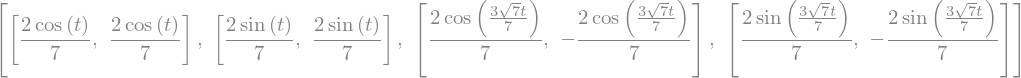

In [39]:
fus

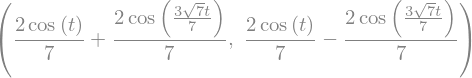

In [40]:
f = fus[0][0] + fus[2][0]
g = fus[0][1] + fus[2][1]
f, g

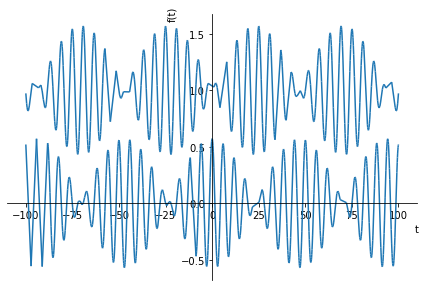

In [41]:
plot(f, g+1, (t,-100, 100));

# Matrixexponentiale

Wir fassen die Variablen $y$ und $w$ zu $Y$ zusammen als

$$
Y = \begin{pmatrix}
y \\ y' \\ w \\ w'
\end{pmatrix}
$$

Dann
$$
Y' = \begin{pmatrix}
    0 & 1 & 0 & 0 \\
    -1-a & 0 & a & 0 \\
    0 & 0 & 0 & 1 \\
    b & 0 & -1-b & 0
\end{pmatrix} Y
$$

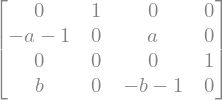

In [42]:
a,b = symbols('a,b')
M_ab = Matrix(4,4, [0,1,0,0,-1-a,0,a,0,0,0,0,1,b,0,-1-b,0])
M_ab

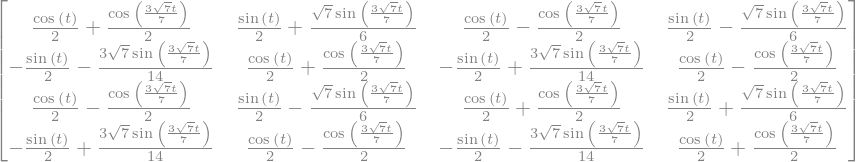

In [43]:
M = M_ab.subs(a, Rational(1,7)).subs(b, Rational(1,7))
M_exp = (M*t).exp()
M_exp

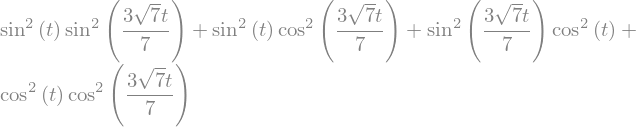

In [44]:
M_exp.det()

In [45]:
M_exp.det().simplify()

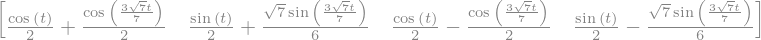

In [46]:
fus = M_exp[0,:]
fus

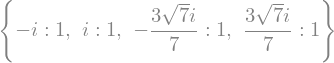

In [47]:
M.eigenvals()

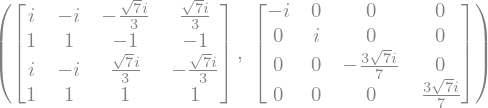

In [48]:
T, J = M.jordan_form()
T, J

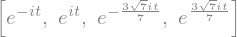

In [49]:
d = []
for j in range(4):
    d.append(exp(t*J[j,j]))
d

In [50]:
M2 = T * Matrix.diag(d) * T**(-1)

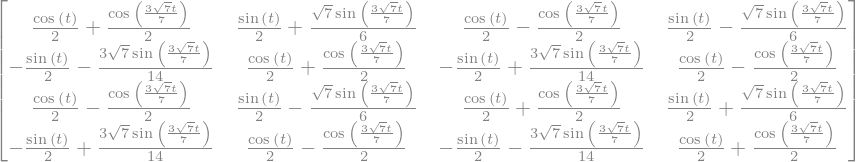

In [51]:
expand(M2, complex=True)